In [33]:
%matplotlib widget
# %matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import os
import sys
sys.path.insert(0, 'functions/')
from h5_tools import *
from fitting_tools import *
import numpy as np
# import h5py as h5
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import pickle
# from matplotlib.colors import LogNorm

In [35]:
h5dir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/'

# Select run

In [36]:
!ls -l /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/

total 60799731
-rw-rw-r--+ 1 mabi3848 hpc-users      23079 Jun 28 14:11 background_0003.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 6100272492 Jun 23 12:18 ferritin_conc_gly_50_5_0004_filtered.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 3054376047 Jun 20 00:02 ferritin_conc_gly_50_5_0004.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 5393549925 Jun 28 06:01 ferritin_conc_gly_50_5_0005_filtered.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2697540517 Jun 20 09:32 ferritin_conc_gly_50_5_0005.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2445210012 Jun 28 06:25 ferritin_conc_gly_50_5_0006_filtered.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 1223385279 Jun 19 23:57 ferritin_conc_gly_50_5_0006.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 5887411479 Jun 28 06:34 ferritin_conc_gly_50_6_0002_filtered.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2945171489 Jun 20 14:57 ferritin_conc_gly_50_6_0002.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 5780836757 Jun 28 07:00 ferritin_conc_gly_50_6_0003_filtered.h5
-rw-rw-r--+ 1 mabi3848 hpc-users 2896089528 Jun 21 19:03 ferritin_conc_g

In [143]:
# fluxes 220K: 4 full beam, 5 45%, 6 22.5%
runname = 'ferritin_conc_gly_50_5'
datasetnumber = 5

# temps full beam: 2 250K, 3 240K, 4 230K, 5 220K, 6 210K
runname = 'ferritin_conc_gly_50_6'
datasetnumber = 2

In [144]:
filename = h5dir + f'{runname}_{datasetnumber:04d}_filtered.h5'
if os.path.isfile(filename):
    print(filename, "\nFile exists: ", os.path.isfile(filename), "\n")
    info = elog_selected_entries_dict(filename)
    for key in info.keys():
        print("{0:20} {1}".format(key, info[key]))
else:
    print(filename, "\nFile exists: False")

/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/ferritin_conc_gly_50_6_0002_filtered.h5 
File exists:  True 

measurement folder   ferritin_conc_gly_50_6_0002
Temperature, K       250.0
transmission (%)     100
Absorbers 80um       0.0
Absorbers 100um      0.0
Short comment        nan
comment              xpcs, 4 reps per spot, 250K, full beam
Exposure time (s)    0.0002
number of frames     5000.0


In [145]:
sample = info['measurement folder']
T = info['Temperature, K'][:-2]
Tr = info['transmission (%)']

# TTC intensity distribution

In [146]:
# with h5py.File(filename, 'r') as f: 
#     f.visititems(visit_func)

In [147]:
# %%time
# plot_ttc(filename)

In [148]:
# ttc_int = load_data(filename, '/xpcs/ttcs/ttc_avg_int')
twotime_par = load_data(filename, '/xpcs/ttcs/twotime_par')
qv = load_data(filename, 'xpcs/g2s/q')

# print("TTC avg int shape: ", np.shape(ttc_int))

In [149]:
deltaq = abs(qv[0]-qv[1])
print(qv[0] - deltaq/2)

0.007999999999999997


In [150]:
# len(ttc_int[0,:,1])

In [151]:
# rep = 0

# for q in range(len(twotime_par)-5):
#     plt.figure(figsize=(3,2))
#     plt.hist(ttc_int[rep,:,q], bins=10)
#     # plt.legend(fontsize=8)
#     plt.title(f"{sample}, T={T[:-2]}K, transm: {Tr}%, q={qv[twotime_par[q]]:.2f}") #. Good runs: {len(ttc_distr[good_inds])}")
#     plt.title(f"{info['Temperature, K'][:-2]}K, Tr={info['transmission (%)']}%, q={qv[twotime_par[q]]:.2f}") #. Good runs: {len(ttc_distr[good_inds])}")
#     # a1.set_title(f"{sample}, T={T[:-2]}K, transm: {Tr}%")
#     plt.xlabel('ttc intensity')
#     # plt.tight_layout()

# Correlation functions

In [152]:
def exponential(x, beta, tau):
    return np.abs(beta) * np.exp( -2*x/(np.abs(tau)) )

def exponential_kww(x, beta, tau, kww):
    return np.abs(beta) * np.exp( -2*(x/(np.abs(tau)))**kww )

def linear(x, m):
    return m*x
# popt,xc,curve,perr = fit(gaussian, x[fmin:fmax], y[fmin:fmax], p0=[.4,.8,.3])


In [153]:
# g2s = load_data(filename, 'xpcs/g2s/g2s')
g2s_f = load_data(filename, 'xpcs/g2s/g2s_filtered')
delay = load_data(filename, 'xpcs/g2s/delay')

print(np.shape(g2s), np.shape(delay), np.shape(qv))

(4, 12, 80) (80,) (12,)


## TODO:
- get g2 errors (from get_item(), std for avg_g2s)
- 

## Q-dependence

### With kww=1

**Filtered and not filtered $g_2$ comparison**

In [154]:
beta_vs_q = np.load('../03-source/contrast_vs_q.npy')
beta_vs_q

array([0.15964507, 0.15949404, 0.15918963, 0.1587956 , 0.15834509,
       0.1576657 , 0.15686018, 0.15597819, 0.15482857, 0.15376757,
       0.15292362, 0.15141127])

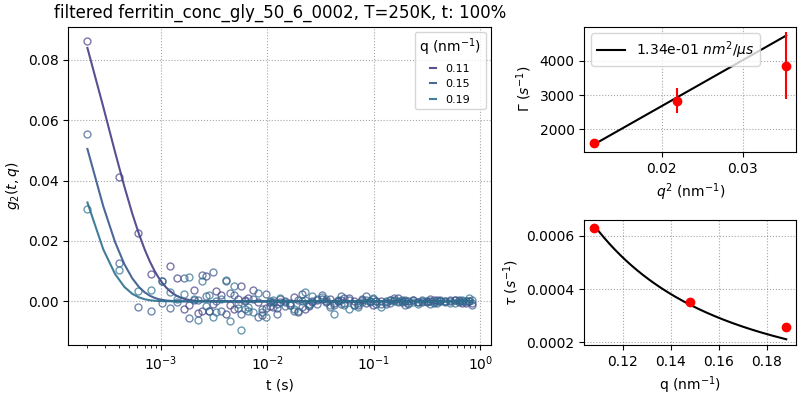

In [158]:
f = plt.figure(figsize=(8,4), constrained_layout=True)
gs = f.add_gridspec(2, 3)
a1 = f.add_subplot(gs[:2, :2])
a3 = f.add_subplot(gs[0, 2])
a4 = f.add_subplot(gs[1, 2])

rep = 0
col = plt.cm.viridis(np.linspace(0,1,len(qv)))
taus, dtaus = [], []
tol = 1e-3

qmin, qmax, qstep = 2, len(qv)-7, 1

for i in range(qmin,qmax,qstep):
    base = np.average(g2s_f[rep,i,-15:])
    a1.plot(delay, g2s_f[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
    
    # -- fitting
    popt,xc,curve,perr = fit(exponential, delay, g2s_f[rep,i,:]-base, p0=[beta_vs_q[i],5e-2], bounds=[(beta_vs_q[i]-tol,0),(beta_vs_q[i]+tol,np.infty)])
    a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')
#     a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])

taus = np.asarray(taus)
popt,xc,curve,perr = fit(linear, qv[qmin:qmax:qstep]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])

# watch out the a3
a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a3.plot(np.sqrt(xc), curve/xc, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a3.errorbar( qv[qmin:qmax:qstep]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
a4.plot( qv[qmin:qmax:qstep], taus, c='r', ls='', marker='o')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
a1.set_title(f"filtered {sample}, T={T}K, t: {Tr}%")
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
a1.grid(ls=':', alpha=.7)
a3.grid(ls=':', alpha=.7)
a4.grid(ls=':', alpha=.7)
a3.legend();

**Free contrast, kww=1**

0.07 	 0.1294
0.11 	 0.1527
0.15 	 0.1609
0.19 	 0.1615
0.23 	 0.1520
0.27 	 0.1477
0.31 	 0.1427
0.35 	 0.1452
0.39 	 0.1530
0.43 	 0.1628
0.47 	 0.1311


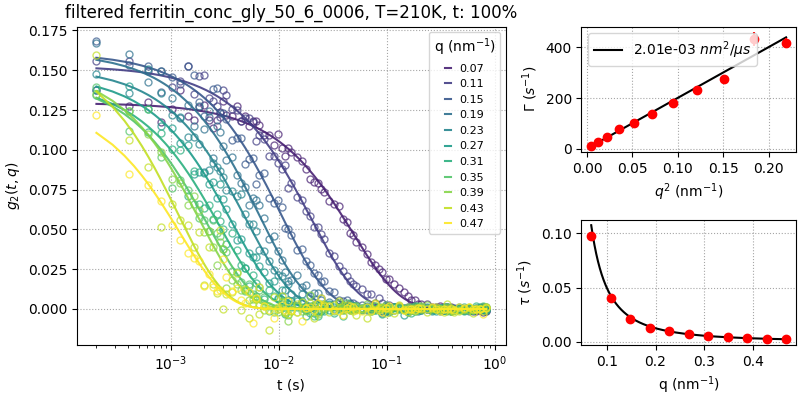

In [83]:
f = plt.figure(figsize=(8,4), constrained_layout=True)
gs = f.add_gridspec(2, 3)
a1 = f.add_subplot(gs[:2, :2])
a3 = f.add_subplot(gs[0, 2])
a4 = f.add_subplot(gs[1, 2])

rep = 0
col = plt.cm.viridis(np.linspace(0,1,len(qv)))
taus, dtaus = [], []
tol = 1e0
for i in range(1,len(qv)):
    base = np.average(g2s_f[rep,i,-15:])
    a1.plot(delay, g2s_f[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
    
    # -- fitting
    popt,xc,curve,perr = fit(exponential, delay, g2s_f[rep,i,:]-base, p0=[beta_vs_q[i],5e-2], bounds=[(0,0),(1,np.infty)])
    a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')
    print(f"{qv[i]:.2f}", '\t', f"{popt[0]:.4f}")
#     a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])

taus = np.asarray(taus)
popt,xc,curve,perr = fit(linear, qv[1:]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])

# watch out the a3
a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a3.plot(np.sqrt(xc), curve/xc, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a3.errorbar(qv[1:]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
a4.plot(qv[1:], taus, c='r', ls='', marker='o')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
a1.set_title(f"filtered {sample}, T={T}K, t: {Tr}%")
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
a1.grid(ls=':', alpha=.7)
a3.grid(ls=':', alpha=.7)
a4.grid(ls=':', alpha=.7)
a3.legend();

### Free kww

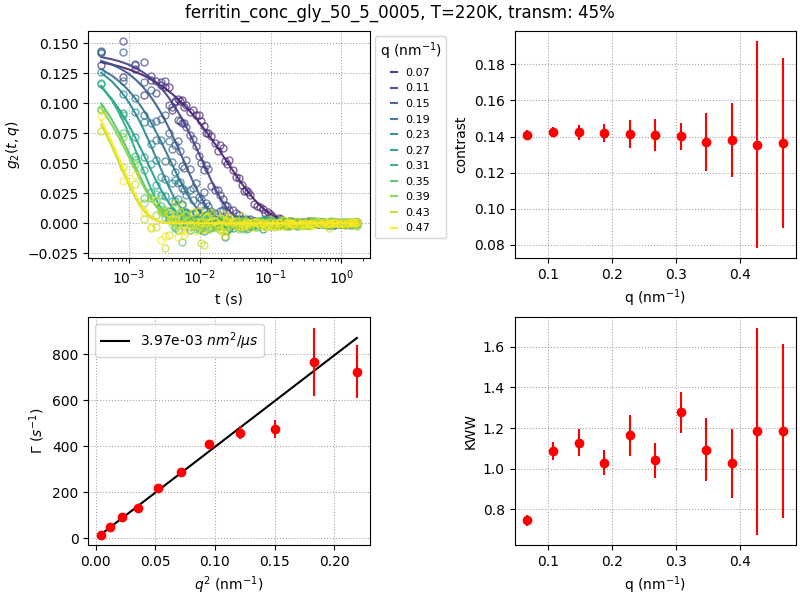

In [50]:
f, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(8,6), constrained_layout=True)
# plt.rcParams['axes.grid'] = True
mpl.rcParams.update({"axes.grid" : True, "grid.color": "gray", "grid.linestyle":":", "grid.alpha": "0.7"})
# f = plt.figure(figsize=(8,4), constrained_layout=True)
# gs = f.add_gridspec(2, 3)
# a1 = f.add_subplot(gs[:2, :2])
# a3 = f.add_subplot(gs[0, 2])
# a4 = f.add_subplot(gs[1, 2])

tol = 1e-3
rep = 0
col = plt.cm.viridis(np.linspace(0,1,len(qv)))
taus, dtaus = [], []

for i in range(1,len(qv)):
    base = np.average(g2s[rep,i,-15:])
    a1.plot(delay, g2s[rep,i,:]-base, c=col[i], ls='', marker='o', ms=5, mfc='none', alpha=0.7)#, label=f'{qv[i]:.2f}')
    
    # -- fitting
    popt,xc,curve,perr = fit(exponential_kww, delay, g2s[rep,i,:]-base, p0=[beta_vs_q[i],5e-2,1.], bounds=[(beta_vs_q[i]-tol,0,0),(beta_vs_q[i]+tol,np.infty,2)])
    a1.plot(xc, curve, c=col[i], ls='-', alpha=0.9, label=f'{qv[i]:.2f}')
    
    a2.errorbar(qv[i], popt[0], perr[0], c='r', ls='', marker='o')
    a4.errorbar(qv[i], popt[-1], perr[-1], c='r', ls='', marker='o')
    taus.append(popt[1])
    dtaus.append(perr[1])

taus = np.asarray(taus)
popt,xc,curve,perr = fit(linear, qv[1:]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])
a3.plot(xc, curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
# a4.plot(np.sqrt(xc), 1/curve, c='k', label=f'{popt[0]*1e-6:.2e} ${{nm}}^{{2}}$/${{\mu s}}$')
a3.errorbar(qv[1:]**2, 1/taus, dtaus/(taus**2), c='r', ls='', marker='o')
# a4.plot(qv[1:], taus, c='r', ls='', mrker='o')

a1.legend(title=r'q (nm$^{-1}$)', fontsize=8, bbox_to_anchor=[1,1], handlelength=.5)
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a2.set_xlabel(r'q (nm$^{-1}$)')
a2.set_ylabel('contrast')
a3.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a4.set_xlabel(r'q (nm$^{-1}$)')
a4.set_ylabel('KWW')
f.suptitle(f"{sample}, T={T}K, transm: {Tr}%")
a3.legend();

## Repetitions

0: D=3.85e-03 nm^2/us
1: D=3.83e-03 nm^2/us
2: D=3.68e-03 nm^2/us
3: D=3.70e-03 nm^2/us


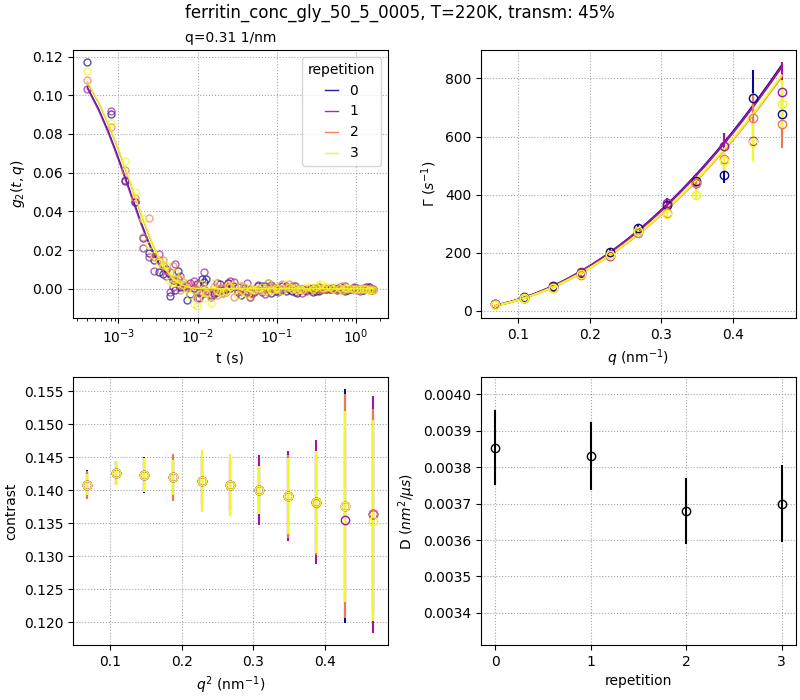

In [51]:
f = plt.figure(figsize=(8,7), constrained_layout=True)
gs = f.add_gridspec(2, 2)
a1 = f.add_subplot(gs[0, 0])
a2 = f.add_subplot(gs[1, 0])
a3 = f.add_subplot(gs[0, 1])
a4 = f.add_subplot(gs[1, 1])

reps = np.arange(0,4)
tol = 1e-3
col = plt.cm.plasma(np.linspace(0,1,len(reps)))
q_sel = 7
D, dD = [], []
for rep in reps:
    taus, dtaus = [], []
    contr,dcontr = [], []
    for i in range(1,len(qv)):
        base = np.average(g2s[rep,i,-15:])
        # -- fit
        # beta_p0, dbeta_p0 = 0.15, 1e-3
        popt,xc,curve,perr = fit(exponential, delay, g2s[rep,i,:]-base, p0=[beta_vs_q[i],5e-2], bounds=[(beta_vs_q[i]-tol,0),(beta_vs_q[i]+tol,np.infty)])
        # -- fit
        taus.append(popt[1])
        dtaus.append(perr[1])
        contr.append(popt[0])
        dcontr.append(perr[0])
        if i == q_sel: 
            a1.plot(delay, g2s[rep,i,:]-base, c=col[rep], ls='', marker='o', ms=5, mfc='none',  alpha=0.7)#, label=f'{qv[i]:.2f}')
            a1.plot(xc, curve, c=col[rep], ls='-', lw=1, alpha=0.9, label=f'{rep}')
            
    taus = np.asarray(taus)
    popt,xc,curve,perr = fit(linear, qv[1:]**2, 1/taus, sigma=dtaus/(taus**2), p0=[5e3])
    a3.plot(np.sqrt(xc), curve, c=col[rep], label=f'{rep}')
    a3.errorbar(qv[1:], 1/taus, dtaus/(taus**2), c=col[rep], ls='', marker='o', mfc='none')
    a2.errorbar(qv[1:], contr, dcontr, c=col[rep], ls='', marker='o', mfc='none')
    D.append(popt[0]*1e-6)
    dD.append(perr[0]*1e-6)
    print(f"{rep}: D={popt[0]*1e-6:.2e} nm^2/us")
a4.errorbar(reps, D, dD, c='k', ls='', marker='o', mfc='none')

f.suptitle(f"{sample}, T={T}K, transm: {Tr}%")
a1.legend(title=r'repetition', fontsize=10, bbox_to_anchor=[1,1], handlelength=1)
a1.set_title(f'q={qv[q_sel]:.2f} 1/nm', fontsize=10)
# a1.set_xlim(0,0.1)
# a1.set_ylim(1e-7,2e-1)
a1.set_xscale('log')
a1.set_xlabel(r't (s)')
a1.set_ylabel(r'$g_2(t,q)$')
a3.set_xlabel(r'$q$ (nm$^{-1}$)')
a3.set_ylabel(r'$\Gamma$ ($s^{-1}$)')
a2.set_xlabel(r'$q^2$ (nm$^{-1}$)')
a2.set_ylabel(r'contrast')
# a4.set_xlabel(r'q (nm$^{-1}$)')
# a4.set_ylabel(r'$\tau$ ($s^{-1}$)')
a4.set_xlabel(r'repetition')
a4.set_ylabel(r'D ($nm^{2}/\mu s$)')
a4.set_xticks(reps)
a1.grid(ls=':', alpha=.7)
a3.grid(ls=':', alpha=.7)
a4.grid(ls=':', alpha=.7)
a4.set_ylim(np.min(D)-0.1*np.min(D), np.min(D)+0.1*np.min(D));
# a3.legend(handlelength=.5);

# Scattering intensity

In [52]:
# with h5py.File(filename, 'r') as f: 
#     f.visititems(visit_func)

In [53]:
Iqs_reps_f = load_data(filename, '/saxs/I_reps_filtered') # (4, 1000)
Iqs_reps = load_data(filename, '/saxs/I_reps') # (4, 1000)
Iqs = load_data(filename, '/saxs/I') # (448, 1000)
qI = load_data(filename, '/saxs/q') # 1000

print(np.shape(Iqs_reps_f), np.shape(Iqs_reps), np.shape(Iqs), np.shape(qI))

(4, 1000) (4, 1000) (448, 1000) (1000,)


**Reptitions**

In [54]:
reps = np.arange(0,4)
reps

array([0, 1, 2, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_19049/4080082746.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  a1.set_ylim(0,2e-3)


(0.0005891163435386593, 0.002)

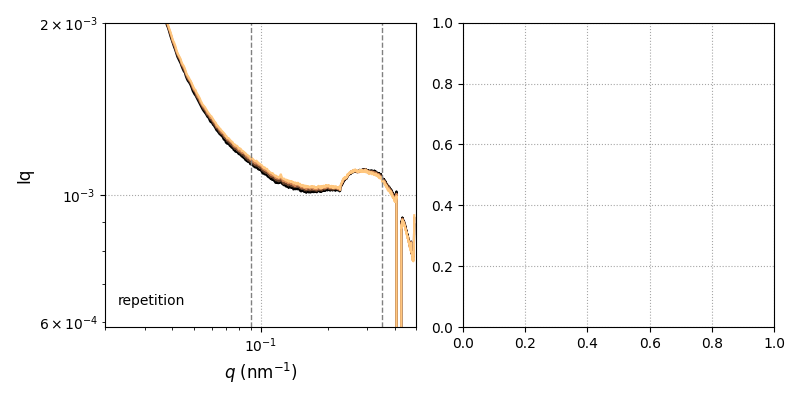

In [55]:
f, (a1,a2) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
col = plt.cm.copper(np.linspace(0,1,len(reps)))

q_index = 170
for i in range(0,len(reps)):
#     a1.plot(qI, Iqs_reps[i,:], ls='-', c=col[i], alpha=.8, label=i)
    a1.plot(qI, Iqs_reps_f[i,:], ls='-', c=col[i])

a1.axvline(x=9e-2, c='gray', ls='--', lw=1) # index 170
a1.axvline(x=3.5e-1, c='gray', ls='--', lw=1) # index 710

a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
a1.set_ylabel('Iq', fontsize=12)
a1.set_xscale('log')
a1.set_yscale('log')
a1.legend(title='repetition', handlelength=.7, frameon=False)
a1.set_xlim(.02,.5)
a1.set_ylim(0,2e-3)

**Spots**

In [56]:
good_ind = load_data(filename, '/xpcs/good_indices')
scans = load_data(filename, '/saxs/scans')
np.shape(scans), np.shape(good_ind)

((448,), (4, 112))

In [57]:
np.sum(good_ind[0,:]), len(good_ind[0,:])

(112, 112)

In [58]:
scan_per_rep = [[], [],  [], []]
for i in range(len(scans)):
    rep = i%4
    scan_per_rep[rep].append(scans[i])
#     print(i, rep, np.shape(reps))
np.shape(scan_per_rep)

(4, 112)

In [59]:
!ls ../03-source

backgrounds.npz
contrast_vs_q2.npy
contrast_vs_q.npy
elog
ferritin_conc_gly_50_4_0002_0002_scan0001_g2.npy
ferritin_conc_gly_50_4_0002_scan0001_avg_g2.npy
Iqs_apo_conc_gly_50_2_0006.npz
water_gly_50_0002_scan0001_avg.npy
water_gly_50_0002_scan0001.npy


In [60]:
# water/glycerol
f = np.load("../03-source/backgrounds.npz")
f.files
Iq_bkg = np.average(f['Iq'][:2,:], axis=0)
q_bkg = f['q']

# apoferritin
f = np.load("../03-source/Iqs_apo_conc_gly_50_2_0006.npz")
f.files
Iq_apo = np.average(f['Iqs'],axis=0)
q_apo = f['q']

In [61]:
t_exp = 2e-4
t_exp_bkg = 1e-1
t_exp_apo = 5e-3

**backgrounds**

(0.4, 1.0)

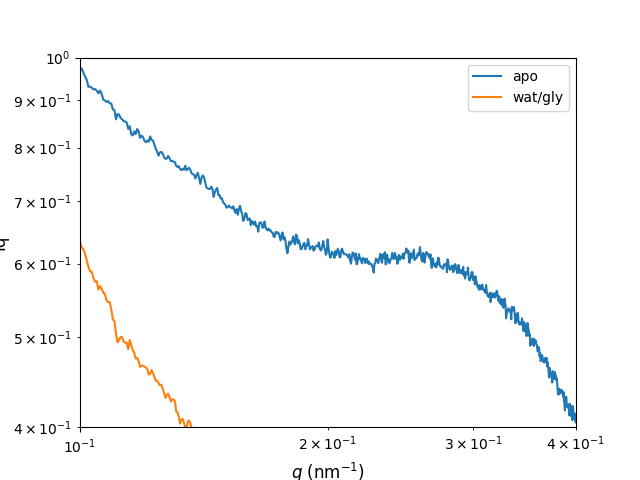

In [62]:
plt.figure()

plt.plot(q_apo, Iq_apo/t_exp_apo, label='apo')
plt.plot(q_bkg, Iq_bkg/t_exp_bkg, label='wat/gly')
# plt.axvline(x=0.23)

plt.legend()
plt.xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
plt.ylabel('Iq', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,4e-1)
plt.ylim(4e-1,1e0)

**Iq background subtraction**

(4.0, 10.0)

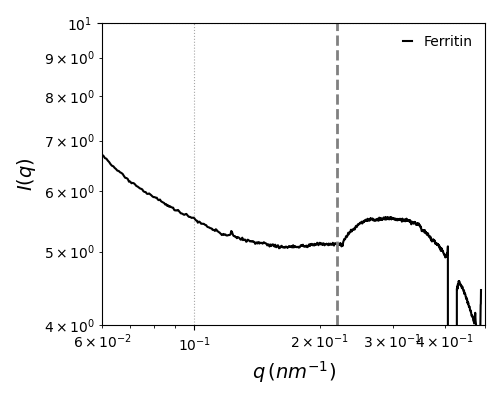

In [63]:
f, (a1) = plt.subplots(1,1, figsize=(5,4), tight_layout=True)
col = plt.cm.inferno(np.linspace(0,1,len(Iqs)))

q_index = 170
# bkg subtraction
# for i in range(0,len(scans)):
#     if scans[i]%4 == 0:
# #     a1.plot(qI, Iqs_reps[i,:], ls='-', c=col[i], alpha=.8, label=i)
#         y = Iqs[i,:]-Iq_bkg/t_exp_bkg*t_exp# - Iq_bkg/Iq_bkg[6]*Iqs[i,6]
#         a1.plot(qI, y, c=col[i], ls='', marker='o', ms=1, mfc='none', label=i)

a1.plot(qI, Iqs_reps[0,:]/t_exp, c='k', label='Ferritin')
# a1.plot(qI, Iqs_reps[0,:]-Iq_bkg/t_exp_bkg*t_exp, c='k')
# a1.plot(q_bkg, Iq_bkg/t_exp_bkg, c='r', label='bkg')

a1.axvline(x=0.22, c='gray', ls='--', lw=2) # index 170

a1.set_xlabel(r'$q\,(nm^{-1}$)', fontsize=14)
a1.set_ylabel('$I(q)$', fontsize=14)
a1.set_xscale('log')
a1.set_yscale('log')
a1.legend(handlelength=.7, frameon=False)
a1.grid(ls=':', alpha=.7, c='gray')
a1.set_xlim(0.06,0.5)
a1.set_ylim(4e0,1e1)
# a1.set_ylim(1e-1,5e-1)


**Plot filtered good runs**

(0.6, 1.6)

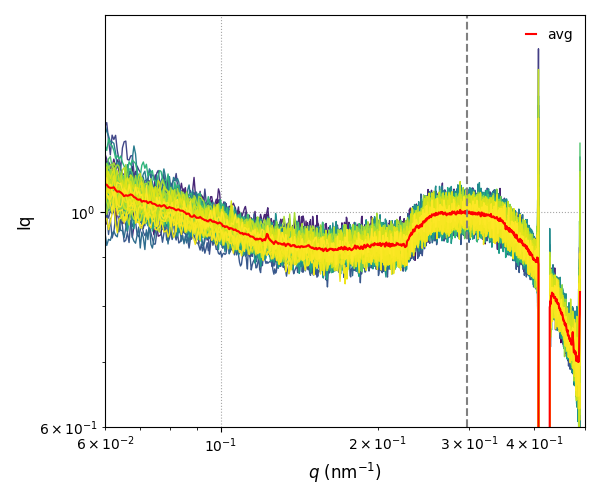

In [64]:
f, a1 = plt.subplots(1,1, figsize=(6,5), tight_layout=True)

rep = 1
qsel = 4
col = plt.cm.viridis(np.linspace(0,1,len(scan_per_rep[rep][:])))
Iq_good = []

for i in range(len(scan_per_rep[rep][:])):
    if good_ind[rep,i]:
        y = Iqs[scan_per_rep[rep][i]-1,:]
        yy = y - Iq_bkg/Iq_bkg[qsel]*y[qsel]
        
        a1.plot(qI, yy/yy[600], c=col[i], lw=1)
        Iq_good.append(yy/yy[600])

Iq_avg = np.mean(Iq_good, axis=0)
a1.plot(qI, Iq_avg, c='r', ls='-', label='avg')


# y_avg = Iq_avg - Iq_bkg/Iq_bkg[qsel]*Iq_avg[qsel]
# a1.plot(qI, y_avg, c='b', lw=2, label='avg-bkg')

# bkg
# y_bkg = Iq_bkg/t_exp_bkg*t_exp
# a1.plot(q_bkg, y_bkg, c='r', label='bkg')

# y_bkg2 = Iq_bkg/Iq_bkg[qsel]*Iq_avg[qsel]
# a1.plot(q_bkg, y_bkg2, c='r', ls='--', label='bkg rescaled')
a1.axvline(x=qI[qsel], c='gray', ls='--')
a1.axvline(x=qI[600], c='gray', ls='--')

a1.set_xlabel(r'$q$ (nm$^{-1}$)', fontsize=12)
a1.set_ylabel('Iq', fontsize=12)
a1.set_xscale('log')
a1.set_yscale('log')
a1.legend(handlelength=.7, frameon=False)
a1.set_xlim(0.06,0.5)
a1.set_ylim(6e-1,1.6e0)